# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [70]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [71]:
# read in readmissions data provided
hospital_read_df = pd.read_csv(r'C:\Users\hhtph\Desktop\cms_hospital_readmissions.csv')

In [72]:
hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16855,BERTRAND CHAFFEE HOSPITAL,330111,NY,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16856,CROWNPOINT HEALTHCARE FACILITY,320062,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16858,GALLUP INDIAN MEDICAL CENTER,320061,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16859,UNIVERSITY OF LOUISVILLE HOSPITAL,180141,KY,READM-30-HIP-KNEE-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [93]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
#clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df['Number of Discharges'].fillna(0.0).astype(int)
clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

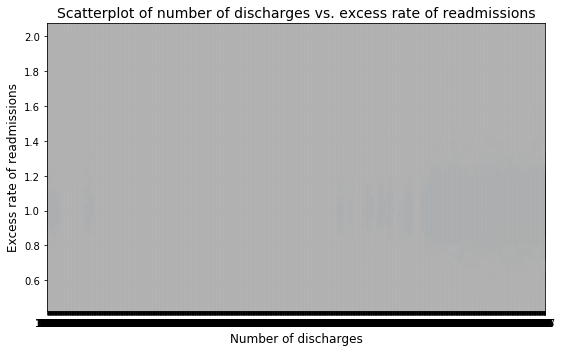

In [94]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Overall, rate of readmissions is trending down with increasing number of discharges

The plot shows that when the number of discharges exceed ~ 1000, the rate of readmission is less
frequent. That does not necessarily mean that there is a correlation between the number of discharges
and the rate of readmission. The plot shows that the majority of excess readmission rate occurs 
between 0 and 1000 discharges. Within this range of discharges, the data looks fairly evenly 
distributed between the excess readmission rates of 0.8 to 1.2 indicating a flat correlation.

With lower number of discharges, there is a greater incidence of excess rate of readmissions 
(area shaded red).

This would be true if the average number of readmission rates for numbers of discharges between
0 and 350 is greater than the average number of readmission rates for numbers of discharges between
350 and 700. It isn't clear just by looking at the plot that this is the case because the plotted 
points are so dense in this region that the individual number of data points can not be determined.
 
With higher number of discharges, there is a greater incidence of lower rates of readmissions 
(area shaded green).

While there are fewer points shown on the plot after 750 discharges, the trend between excess rate
of readmissions and discharges appears to be flat. So, the majority of rate of readmissions at larger
discharge rates remains between 0.8 and 1.2.


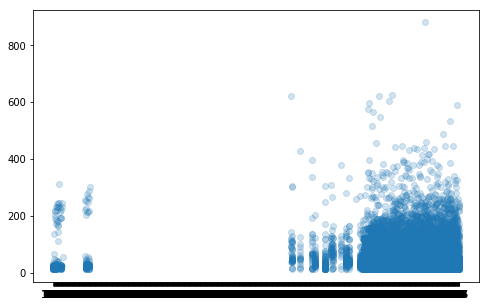

In [95]:
# Look at the number of discharges vs. the number of readmissions

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Number of Readmissions'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

In [96]:
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
#hospital_read_df_lt100 = hospital_read_df['Number of Discharges'] < 100

#clean_hospital_read_df2 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != '0']

In [97]:
clean_hospital_read_df2.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13725,EMORY UNIVERSITY HOSPITAL,110010,GA,READM-30-HIP-KNEE-HRRP,852,NaN,0.6322,3.1,4.8,18.0,07/01/2010,06/30/2013
13727,SUTTER GENERAL HOSPITAL,50108,CA,READM-30-HIP-KNEE-HRRP,1032,NaN,0.6262,3.0,4.8,23.0,07/01/2010,06/30/2013
13728,"SAINT JOSEPH'S HOSPITAL OF ATLANTA, INC",110082,GA,READM-30-HIP-KNEE-HRRP,1379,NaN,0.6195,2.8,4.5,30.0,07/01/2010,06/30/2013
13729,CHI HEALTH GOOD SAMARITAN,280009,NE,READM-30-HIP-KNEE-HRRP,843,NaN,0.5748,2.9,5.1,15.0,07/01/2010,06/30/2013
13730,HOAG ORTHOPEDIC INSTITUTE,50769,CA,READM-30-HIP-KNEE-HRRP,2393,NaN,0.5495,2.7,4.9,54.0,07/01/2010,06/30/2013


Text(0.5,1,'Scatterplot of number of readmissions vs. excess rate of readmissions')

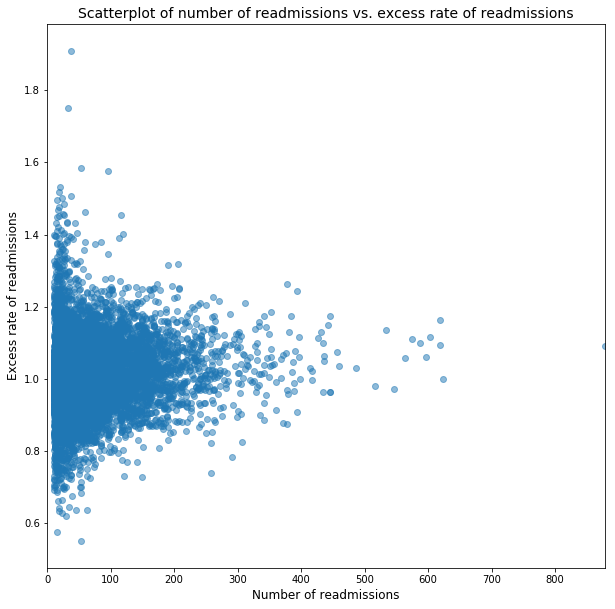

In [98]:
x = [a for a in clean_hospital_read_df2['Number of Readmissions']]  #[81:-3]]
y = list(clean_hospital_read_df2['Excess Readmission Ratio'])  #[81:-3])

fig, ax2 = plt.subplots(figsize=(10,10))
ax2.scatter(x, y,alpha=0.5)

ax2.set_xlim([0, max(x)])
ax2.set_xlabel('Number of readmissions', fontsize=12)
ax2.set_ylabel('Excess rate of readmissions', fontsize=12)
ax2.set_title('Scatterplot of number of readmissions vs. excess rate of readmissions', fontsize=14)

In [99]:
clean_hospital_read_df2['Excess Readmission Ratio'].mean()

1.007503783595717

In [119]:
from scipy import stats
pd.to_numeric(clean_hospital_read_df2['Number of Discharges'], errors = 'coerce')
print (clean_hospital_read_df['Number of Discharges'])
clean_hospital_read_df2['Excess Readmission Ratio'].astype(float)
print(clean_hospital_read_df2['Excess Readmission Ratio'])


0         242
1         247
2         586
3         965
4         149
5         141
6         390
7         178
8          98
9         256
10        121
11        108
12        780
13        216
14       1458
15        238
16        154
17        117
18        322
19         98
20        493
21        332
22        136
23        179
24         97
25        536
26        268
27       1658
28        260
29         57
         ... 
15679       0
15682       0
15697       0
15703       0
15765       0
15806       0
15843       0
15907       0
15927       0
15987       0
16086       0
16129       0
16160       0
16201       0
16213       0
16234       0
16317       0
16339       0
16350       0
16409       0
16429       0
16518       0
16541       0
16553       0
16565       0
16661       0
16664       0
16812       0
16818       0
16857       0
Name: Number of Discharges, Length: 11578, dtype: object
0        1.9095
1        1.7521
2        1.5836
3        1.5760
4        1.5308
5        

In [114]:
from scipy import stats
print(clean_hospital_read_df2['Excess Readmission Ratio'])
print(clean_hospital_read_df2['Number of Discharges'])
stats.pearsonr[clean_hospital_read_df2['Excess Readmission Ratio'],clean_hospital_read_df2['Number of Discharges']]

0        1.9095
1        1.7521
2        1.5836
3        1.5760
4        1.5308
5        1.5189
6        1.5079
7        1.5019
8        1.4953
9        1.4844
10       1.4776
11       1.4691
12       1.4612
13       1.4559
14       1.4543
15       1.4532
16       1.4528
17       1.4486
18       1.4348
19       1.4333
20       1.4321
21       1.4317
22       1.4200
23       1.4133
24       1.4088
25       1.4033
26       1.4031
27       1.4026
28       1.4022
29       1.3992
          ...  
13693    0.7181
13695    0.7139
13697    0.7098
13698    0.7062
13701    0.7048
13702    0.7023
13703    0.7016
13704    0.7000
13705    0.6998
13706    0.6997
13707    0.6994
13708    0.6987
13709    0.6972
13710    0.6950
13712    0.6914
13713    0.6905
13714    0.6853
13715    0.6829
13716    0.6736
13717    0.6644
13718    0.6600
13720    0.6428
13721    0.6422
13723    0.6350
13724    0.6347
13725    0.6322
13727    0.6262
13728    0.6195
13729    0.5748
13730    0.5495
Name: Excess Readmission

TypeError: 'function' object is not subscriptable